In [85]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm, trange

from tabicl.prior.prior_config import DEFAULT_SAMPLED_HP
from tabicl.prior.hp_sampling import HpSampler, HpSamplerList

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
sampler_list = HpSamplerList(DEFAULT_SAMPLED_HP, device='cpu')
sampler = sampler_list.sample()
sampler

{'multiclass_type': 'value',
 'mlp_activations': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_choice_mixed_sampler.<locals>.sampler.<locals>.<lambda>()>,
 'block_wise_dropout': True,
 'mlp_dropout_prob': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_beta_sampler.<locals>.sampler.<locals>.<lambda>()>,
 'is_causal': True,
 'num_causes': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_trunc_norm_log_scaled_sampler.<locals>.sampler.<locals>.sub_sampler()>,
 'y_is_effect': False,
 'in_clique': True,
 'sort_features': False,
 'num_layers': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_trunc_norm_log_scaled_sampler.<locals>.sampler.<locals>.sub_sampler()>,
 'hidden_dim': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_trunc_norm_log_scaled_sampler.<locals>.sampler.<locals>.sub_sampler()>,
 'init_std': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_trunc_norm_log_scaled_sampler.<locals>.sampler.<locals>.sub_sampler()>,
 'noise_std': <func

In [91]:
n_meta_samples = 100
n_samples = 500

mlp_dropout_probs = []
block_wise_dropout = []
is_causals = []
hidden_dims = []
for meta_sample_idx in trange(n_meta_samples):
    sampler = sampler_list.sample()
    mlp_dropout_probs.append([sampler['mlp_dropout_prob']() for _ in range(n_samples)])
    block_wise_dropout.append(sampler['block_wise_dropout'])
    is_causals.append(sampler['is_causal'])
    hidden_dims.append([sampler['hidden_dim']() for _ in range(n_samples)])
mlp_dropout_probs = np.array(mlp_dropout_probs)


100%|██████████| 100/100 [00:16<00:00,  6.07it/s]


array([0.35623547, 0.26647536, 0.52513811, ..., 0.49746704, 0.62120411,
       0.58323065], shape=(50000,))

<Axes: xlabel='Is Causal'>

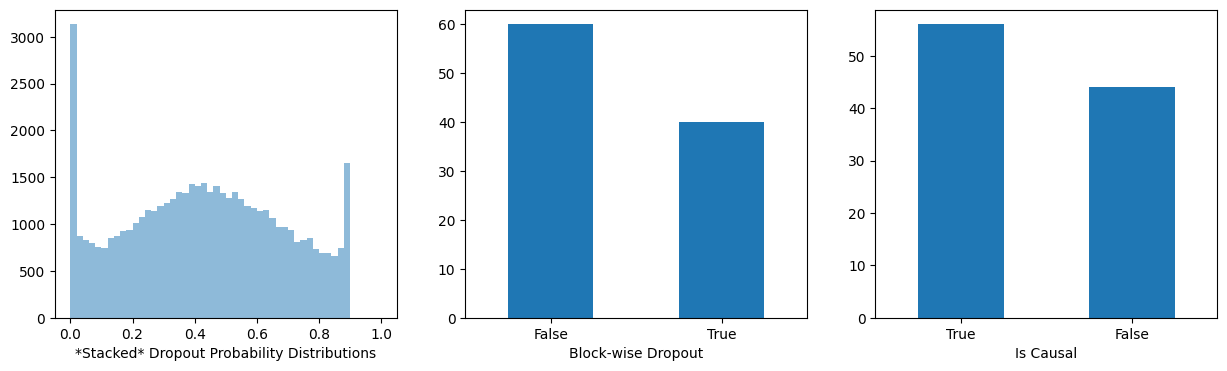

In [103]:
n_cols = 3
fig, axs = plt.subplots(1, n_cols, figsize=(n_cols * 5, 4))

# for i in range(n_meta_samples):
#     ax.hist(mlp_dropout_probs[i], bins=np.linspace(0, 1, 51), alpha = 0.05, density=False, color='tab:blue')
axs[0].hist(np.concatenate(mlp_dropout_probs), bins=np.linspace(0, 1, 51), alpha=0.5, density=False, color='tab:blue')
axs[0].set_xlabel('*Stacked* Dropout Probability Distributions')

pd.Series(block_wise_dropout).value_counts().plot(kind='bar', ax=axs[1], xlabel='Block-wise Dropout', rot=0)

pd.Series(is_causals).value_counts().plot(kind='bar', ax=axs[2], xlabel='Is Causal', rot=0)


